Plotting

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def gen_sample_grid(npx=200, npy=200, limit=1):
  x1line = np.linspace(-limit, limit, npx)
  x2line = np.linspace(-limit, limit, npy)
  x1grid, x2grid = np.meshgrid(x1line, x2line)
  Xgrid = np.array([x1grid, x2grid]).reshape([2,npx*npy]).T
  return Xgrid,x1line,x2line

In [ ]:
#fig, ax = plt.subplots()
#Plotting

#ax.scatter()
#plt.contourf(x1line, x2line, pgrid) - (200,),(200,)(4000,2)


# Setting limits
#plt.ylim(1,10)
#ax.set_xlim([25, 50])

#plt.colorbar()

# Linear Regression

In [ ]:
x = np.linspace(0,10,100)
y = np.linspace(100,200,100) + 5

### 1D

In [ ]:
A = np.array( [ [np.sum(x), np.sum(x**2)],
                [len(x), np.sum(x)]])

B = np.array([[np.dot(x,y)], 
              [np.sum(y)]])

betas = np.linalg.solve(A,B)
betas

array([[105.],
       [ 10.]])

### 1D - 2 degree polynomial

In [ ]:
A = np.array([[np.sum(x ** 2), np.sum(x ** 3), np.sum(x ** 4)], 
              [np.sum(x), np.sum(x ** 2), np.sum(x ** 3)],
              [len(x), np.sum(x), np.sum(x ** 2)]])

B = np.array([np.dot(x ** 2, y), np.dot(x, y), np.sum(y)]).T

betas = np.linalg.solve(A,B)
betas

array([1.05000000e+02, 1.00000000e+01, 1.16810743e-14])

In [ ]:
#Alternative

betas = np.polynomial.polynomial.polyfit(x,y,deg=2)
betas

array([ 1.05000000e+02,  1.00000000e+01, -3.78457759e-16])

### 2D

In [ ]:
df = pd.read_csv("http://pogo.software/me4ml/rjteh/d3.csv")
x = df['x']
y = df['y']
xc = np.cos(np.pi*x)

A = np.array([[np.sum(xc), np.dot(x, xc), np.sum(xc**2) ], 
              [np.sum(x), np.sum(x ** 2), np.sum(x*xc) ],
              [len(x), np.sum(x), np.sum(xc)]])

B = np.array([np.dot(xc, y), np.dot(x, y), np.sum(y)]).T


betas = np.linalg.solve(A,B)
betas

array([3.85148825, 3.0761603 , 2.68219645])

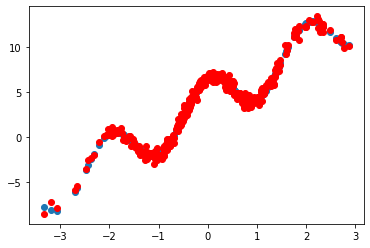

In [ ]:
y_pred = betas[0] + x*betas[1] + xc*betas[2]
plt.scatter(x,y_pred)
plt.scatter(x,y,color='r')

### Gradient Descent

In [ ]:
y_pred = lambda b0,b1,b2: b2*x + b1 * np.cos(np.pi*x) + b0

def calc_error(b0,b1,b2):
  error = ((y-y_pred(b0,b1,b2)) ** 2).sum()/(len(x))
  return error


def calc_gradient(parameter):
 
  global b0,b1,b2,x
  error = calc_error(b0,b1,b2)

  if parameter == "b0":
    step = b0/100
    new_error = calc_error(b0+step,b1,b2)
  elif parameter == "b1":
    step = b1/100
    new_error = calc_error(b0,b1+step,b2)
  elif parameter == "b2":
    step = b2/100
    new_error = calc_error(b0,b1,b2+step)

  return (new_error - error)/step

# Set initial Values
b0 = 1
b1 = 1
b2 = 1

error_initial = calc_error(b0,b1,b2)
print("Initial error is ", error_initial)

n_iteration = 100
n_learning = 0.5

for i in range(n_iteration):
  b0 = b0 - n_learning * calc_gradient("b0")
  b1 = b1 - n_learning * calc_gradient("b1")
  b2 = b2 - n_learning * calc_gradient("b2")
  print("Error at iteration ", i, " is " ,calc_error(b0,b1,b2))



Initial error is  15.116166730529072
Error at iteration  0  is  1.5285918858461427
Error at iteration  1  is  0.44298270089525255
Error at iteration  2  is  0.21167129773829982
Error at iteration  3  is  0.17552699335922486
Error at iteration  4  is  0.16294820297312568
Error at iteration  5  is  0.16206145518001766
Error at iteration  6  is  0.16088857185080702
Error at iteration  7  is  0.16092772078349288
Error at iteration  8  is  0.16075723899298616
Error at iteration  9  is  0.1607661686764298
Error at iteration  10  is  0.16073519628812885
Error at iteration  11  is  0.16073513853777044
Error at iteration  12  is  0.16072890044261498
Error at iteration  13  is  0.1607283740260691
Error at iteration  14  is  0.16072704046661662
Error at iteration  15  is  0.16072681268869624
Error at iteration  16  is  0.16072651510079364
Error at iteration  17  is  0.1607264407662401
Error at iteration  18  is  0.16072637208279572
Error at iteration  19  is  0.16072635035926644
Error at iteratio

## Plotting Linear Disc Functions

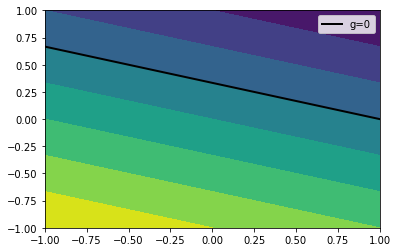

In [ ]:
Xgrid,x1line,x2line = gen_sample_grid(20, 20, limit=1)

w1 = np.array([[-1],[-3]])
w0 = 1

g = np.matmul(w1.T, Xgrid.T) + w0
g = g.reshape(20,20)

#Plot

plt.contourf(x1line,x2line,g)
# Plot g= 0 line (eq by hand) : x2 = (1-x1)/3
g_0 = (1-x1line)/3

plt.plot(x1line,g_0, linewidth=2,color='black',label='g=0')
plt.legend()

For comparing multiple linear disc functions

In [ ]:
#g1  = np.matmul(Xgrid,weighing1) ..
#gconc = np.concatenate([g1,g2,g3],axis=1)

#omega = np.argmax(gconc,axis=1)
#omega = np.reshape(omega,[length,length])
#plt.contourf(x1line,x2line,omega)

## Neural Network Activation Functions

In [ ]:
def simgoid(x):
  return 1/ (1+np.exp(-x))

def relu(x):
  xo = np.copy(x)
  xo[x < 0] = 0
  return xo

def softmax(x):
  #return np.exp(x) / np.sum( [np.exp(x[i] for all i)])
  return

def sign(x):
  return x > 0

def softplus(x):
  return np.log(1+np.exp(x))


KMeans code

In [ ]:
df = pd.read_csv("http://pogo.software/me4ml/rjteh/d1.csv")
x1 = df['x1']
x2 = df['x2']

y1_mean = np.array((-1,-1))
y2_mean = np.array((2,1))


def KMeans(x1,x2,y1_mean,y2_mean):
  y1_dist = np.sqrt((x1 - y1_mean[0])**2 + (x2 - y1_mean[1])**2)
  y2_dist = np.sqrt((x1 - y2_mean[0])**2 + (x2 - y2_mean[1])**2)
  classes = np.array(y1_dist < y2_dist) # True means class 1, False means class 2

  # Below I create the class array, with 1 and 2 representing each class
  y = np.zeros(len(classes)) 
  for i in range(len(classes)):
    if classes[i] == True: # True corresponds to class 1
      y[i] = 1
    else:
      y[i] = 2

  y1_mean = np.array((x1[y==1].mean(),x2[y==1].mean()))
  y2_mean = np.array((x1[y==2].mean(),x2[y==2].mean()))

  return (y1_dist,y2_dist, y, y1_mean,y2_mean)


  


  

KNN code

## Support Vectors

In [ ]:
a = np.array([0, 0]) # Class 1 support
b = np.array([0.4, 1]) # Class 1 support
c = np.array([1, 0]) # Class 2 support

#### Using two support vectors on the same side

In [ ]:
#Finding SVM Line
d = b-a # support lime parallel to b-a
dn = d/np.linalg.norm(d) # normalise
p0 = 0.5*(a+c) # Point on surface

m = d[1]/d[0] # gradient

c = p0[1] - p0[0]*m # find offset term


print("y = "+str(m)+"x + "+str(c))


y = 2.5x + -1.25


#### ***Using two support vectors on the opposite side

In [ ]:
w = c-a
p0 = 0.5*(a+c)
np.dot(w,p0)
w

array([-1.25, -1.25])

## Principal Components

Find missing pc given others

In [ ]:
p1 = np.array((2/3,1/3,2/3))
p2 = np.array((1/3,2/3,-2/3))

p3 = np.cross(p1,p2)

Express a point as combination of these

In [ ]:
x = np.array((3,2,1)) # our point

#just use dot products here - works since orthogonal unit vectors
w1 = np.dot(p1,x)
w2 = np.dot(p2,x)
w3 = np.dot(p3,x)


Get PCA from just points

In [ ]:
# row1 is x1, row2 is x2
A = np.array([ [1,2,3], 
              [-2,-4,-6]])

# Subtract mean
A[0] = A[0]- np.mean(A[0])
A[1] = A[1] -np.mean(A[1])

# Get covariance
cov = np.cov(A)

# Get eigenvalues - ***Columns are vectors
values,vectors = np.linalg.eig(cov)
vectors

array([[-0.89442719,  0.4472136 ],
       [-0.4472136 , -0.89442719]])

In [ ]:
vectors[:,0] # First element corresponding to values[0]

array([-0.89442719, -0.4472136 ])

Principal20Analysis20vector.png

## Parzen Windows

1D

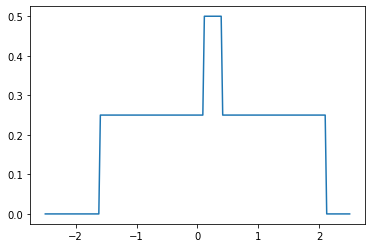

In [ ]:
x = np.linspace(-2.5, 2.5,200) # graph range
p = np.zeros(x.shape)

x1=-0.6
x1_low = 0.1
x2 = 1.1
h = 2
m = 2

p[np.logical_and(x > -0.6 - h/2, x< -0.6 + h/2)] +=1
p[np.logical_and(x > 1.1 - h/2, x< 1.1 + h/2)] +=1

p /= (h*m)

fig, ax = plt.subplots()
ax.plot(x,p)

2D

In [ ]:
df = pd.read_csv("http://pogo.software/me4ml/womue/s3.csv")
x1 = np.array(df['x1'])
x2 = np.array(df['x2'])

n_total = x1.shape[0]

In [ ]:
h = 0.5
point = [1,0.5]

a = np.logical_and( np.logical_and(0.75 < x1, x1 < 1.25), 
                   np.logical_and(0.25 < x2, x2 < 0.75) )

n_sum = a.sum()

pdf = n_sum /(h**2) / n_total
pdf

0.56